        Implements the algorithm described in 

            D. W. Griffin and J. S. Lim, “Signal estimation from modified short-time Fourier transform,” IEEE Trans. ASSP, vol.32, no.2, pp.236–243, Apr. 1984.            

        Follows closely the implentation of https://github.com/tensorflow/magenta/blob/master/magenta/models/nsynth/utils.py

## Morlet wavelet

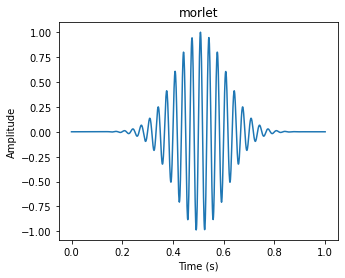

In [1]:
from ketos.audio.waveform import Waveform

wf = Waveform.morlet(rate=1000, frequency=30., width=0.1, displacement=0.25/30., samples=1000)

fig = wf.plot()

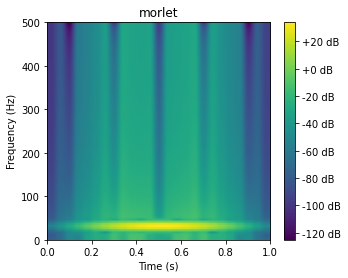

In [2]:
from ketos.audio.spectrogram import MagSpectrogram

spec = MagSpectrogram.from_waveform(audio=wf, window=0.2, step=0.04)

fig = spec.plot()

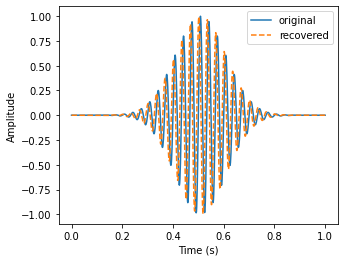

In [3]:
from ketos.audio.waveform import plot

wf_r = spec.recover_waveform(num_iters=25)

fig = plot([wf, wf_r], labels=['original', 'recovered'])

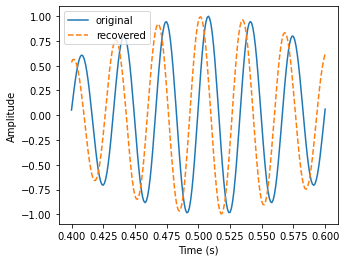

In [4]:
fig = plot([wf, wf_r], labels=['original', 'recovered'], offset=0.4, duration=0.2)

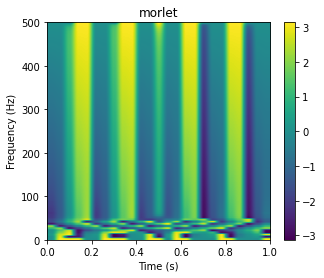

In [5]:
spec = MagSpectrogram.from_waveform(audio=wf, window=0.2, step=0.04, compute_phase=True)

fig = spec.plot_phase_angle()

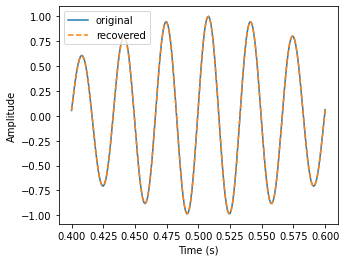

In [6]:
wf_r = spec.recover_waveform(num_iters=25)
fig = plot([wf, wf_r], labels=['original', 'recovered'], offset=0.4, duration=0.2)

## An S1 call

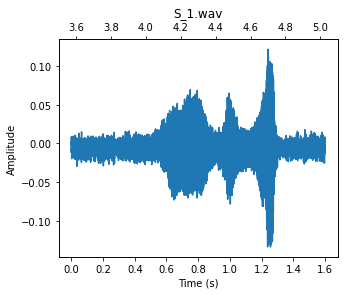

In [7]:
wf = Waveform.from_wav("S_1.wav", offset=3.5, duration=1.6, rate=44000)

fig = wf.plot()

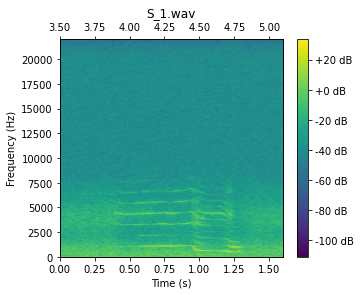

In [8]:
spec = MagSpectrogram.from_waveform(wf, window=0.040, step=0.010, freq_min=0, compute_phase=True)

fig = spec.plot()

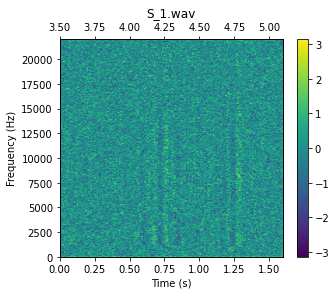

In [9]:
fig = spec.plot_phase_angle()

In [10]:
wf_r = spec.recover_waveform(num_iters=25)

In [11]:
import numpy as np

phi = spec.get_phase_angle() 

phi += np.random.uniform(0, 2*np.pi, size=phi.shape) #add rndm distortion

wf_m = spec.recover_waveform(num_iters=25, phase_angle=phi)

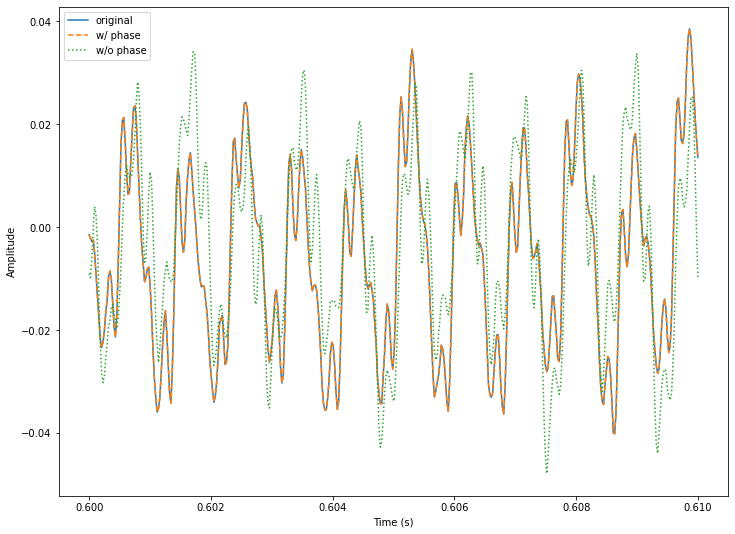

In [12]:
fig = plot([wf, wf_r, wf_m], labels=['original', 'w/ phase', 'w/o phase'], offset=0.6, duration=0.01, figsize=(12,9))

In [13]:
y = wf.get_data()
y_r = wf_r.get_data()
y_m = wf_m.get_data()

err_r = np.std(y - y_r) / np.std(y)
err_m = np.std(y - y_m) / np.std(y)

print(f"Error using actual phase: {err_r:.2g}") 
print(f"Error using modified phase: {err_m:.2g}") 

Error using actual phase: 0.00094
Error using modified phase: 1.1


In [14]:
# listen to the waveforms
import IPython.display as ipd

ipd.clear_output()

ipd.display(ipd.Audio(data=wf.get_data(), rate=wf.rate))

ipd.display(ipd.Audio(data=wf_r.get_data(), rate=wf_r.rate))

ipd.display(ipd.Audio(data=wf_m.get_data(), rate=wf_m.rate))